<a href="https://colab.research.google.com/github/khanfs/Modelling-Biology/blob/main/04_Markov_processes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 4: Markov processes

## More time on matrices, eigenvalues, and eigenvectors

Previously, we've talked about finding eigenvalues of systems using an algebraic approach.
It is often easier to use an approach using matrices.

Eigenvectors are, in some sense, important '_directions_' in the phase space of the system and eigenvalues are corresponding _magnitudes_.

Consider the system:

$$ \frac{d\mathbf{x}}{dt} = A \mathbf{x} $$

Where (for a $2\times 2$ system):

$$ \mathbf{x} = \begin{bmatrix}x\\y\end{bmatrix},\;
    A = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix}$$

We assume solutions of the form:

$$ \mathbf{x}(t) = \mathbf{v}e^{\lambda t} $$

Where $\mathbf{v}$ is a vector with entries independent of time.
So:

$$ \begin{aligned}
    \frac{d\mathbf{x}}{dt} &= A \mathbf{x} \\
    \mathbf{v}\frac{d}{dt}e^{\lambda t} &= A\mathbf{v}e^{\lambda t}\\
    \lambda\mathbf{v} &=A\mathbf{v}
    \end{aligned}$$
    
So for $\mathbf{x}(t)$ to be a solution, this equation has to be satisfied.
We can write this as :

$$ (A - \lambda I)\mathbf{v} = 0$$

Where $I$ is the identity matrix (1s along the diagonal, otherwise 0s):
$$I = \begin{pmatrix}
    1 & 0 & \ldots & 0 \\
    0 & 1 & \ldots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \ldots & 1
    \end{pmatrix}$$
    
Other than the trivial solution $\mathbf{v} = 0$, we must have:

$$ \det(A - \lambda I) = 0 $$

The eigenvalues of a $2\times 2$ system will always be:

$$ \lambda_{1,2} = \tfrac{1}{2}\left(\beta \pm \sqrt{\delta}\right) $$

Where:

$$\begin{aligned}
    \beta &= \text{trace } A = a_{11} + a_{22} \\
    \gamma &= \det A = a_{11} a_{22} - a_{12} a_{21}\\
    \delta &= \text{disc } A = \beta^2 - 4\gamma\\
    \end{aligned}$$
    
Once the eigenvalues are known, the eigenvectors $\mathbf{v_i}$ can be found from $ (A - \lambda_i I)\mathbf{v_i} = 0$:

$$\begin{aligned}
    \begin{bmatrix} a_{11}-\lambda_i & a_{12} \\ a_{21} & a_{22}-\lambda_i \end{bmatrix}\begin{bmatrix} v_{i,1} \\ v_{i,2} \end{bmatrix} = 0\\
    \begin{bmatrix} (a_{11}-\lambda_i)v_{i,1} + a_{12}v_{i,2} \\ a_{21}v_{i,1} + (a_{22}-\lambda_i)v_{i,2} \end{bmatrix} = 0
    \end{aligned}$$
    
As we're only interested in the _direction_ (not _magnitude_) of the vector, we can choose $v_{i,1}=1$, then:

$$\mathbf{v_i} = \begin{bmatrix} 1 \\ \frac{\lambda_i - a_{11}}{a_{12}} \end{bmatrix}$$

Which is only defined when $a_{12} \neq 0$.

Finally, the general solution is given by:

$$ \mathbf{x}(t) = c_1 \mathbf{v_1} e^{\lambda_1 t} + c_2 \mathbf{v_2} e^{\lambda_2 t} $$

## What is a Markov chain?

_Markov chains_ (or _Markov processes_) can generally be distinguished by a dependence only on the previous time-step — they are _memoryless_, or they fulfil the _Markov property_.

> A Markov chain (discrete-time Markov chain or DTMC), named after Andrey Markov, is a random process that undergoes transitions from one state to another on a state space. It must possess a property that is usually characterized as "memorylessness": the probability distribution of the next state depends only on the current state and not on the sequence of events that preceded it. This specific kind of "memorylessness" is called the Markov property. Markov chains have many applications as statistical models of real-world processes. [Wikipedia](https://en.wikipedia.org/wiki/Markov_chain)

> A stochastic process has the Markov property if the conditional probability distribution of future states of the process (conditional on both past and present states) depends only upon the present state, not on the sequence of events that preceded it. A process with this property is called a Markov process. [Wikipedia](https://en.wikipedia.org/wiki/Markov_property)

So every system undergoing a Markov process is in exactly one state at every time-step.

Consider a system with a finite number of states.
Example of such systems could be:

- An individual in the SIR model (from session 3), states: S, I, R.
- Ion channels on the extracellular membrane which can be closed/open.
- Gene expression (a gene is either expressing or not).

Imagine a system with $n$ states: $S_1,\ldots,S_n$.
At each time-step the system is capable of undergoing a _state transition_ with some probability.
If the system is currently in state $S_i$:

$$ S_i \overset{p_{ij}}{\rightarrow} S_j $$

The _transition probabilities_ $p_{ij}$ (probability of $S_j$ given $S_i$) satisfy:

$$0 \leq p_{ij} \leq 1 \;\text{ and }\; \sum_{j=1}^n p_{ij} = 1 \text{ for each $i$} $$

That is, the probabilities for where each state ends up must sum to 1.

We can also write the $p_{ij}$ in the form of a (right) _transition (probability) matrix_:
$$P = \begin{bmatrix}
    p_{11} & \ldots & p_{1n} \\
    \vdots & \ddots & \vdots \\
    p_{n1} & \ldots & p_{nn}
    \end{bmatrix}$$
    
In this case, the sum of each row must be 1.
(In general we will assume $P$ is a _regular matrix_, this means that $p_{ij}>0$ for all $i$, $j$.) 

The transition probability matrix $P$ defines a (finite) Markov chain over the states. (In comparison to infinite Markov chains, which have infinite numbers of states.)

A _sample path_ of a Markov chain is a single simulation, a sequence of states:

$$ i_0 \rightarrow i_1 \rightarrow i_2 \rightarrow \ldots $$

Where $i_k$ is shorthand for $S_{i_k}$.
A sample path occurs with probability:

$$p_{i_0 i_1} p_{i_1 i_2} p_{i_2 i_3} \ldots$$

## Example, dietary habits of a monkey

In London Zoo, there is a very fussy monkey.
It eats exactly once a day, either a banana, a papaya, or an orange:
- If it ate a banana today, tomorrow it will eat a banana or an orange with equal probability.
- If it ate a papaya today, tomorrow it will eat a banana with probability 0.1, a papaya with probability 0.4 or an orange with probability 0.5.
- If it ate an orange today, tomorrow it will eat a banana with probability 0.4 or papaya with probability 0.6.

### Directed graph

![Diagram](images/04_monkeydiet.png)

## Example, a simple switch

A particular type of ion channels on the surface of a cell undergoes spontaneous opening and closing. 

### Model outline

**Aim:** To understand what the signal from the ion channel would look like.

**Scale:** Molecular, single molecule

**Approach/method:** Markov process

**Simplifications:**

- Time is discrete.

**Assumptions:**

- The ion channel can only ever be open or closed (not between these states).
- There are no regulatory molecules (the dynamics are consistent for all time).

### Model mathematics

The system can described with two states (e.g. $S_1=\text{off}$ and $S_2=\text{on}$).

![Diagram](images/04_offon.png)

This gives the transition matrix:

$$P = \begin{bmatrix}
    p & 1-p \\
    1-q & q
    \end{bmatrix}$$

From this we can simulate sample paths. 

P=|0.8 0.2|
  |0.2 0.8|


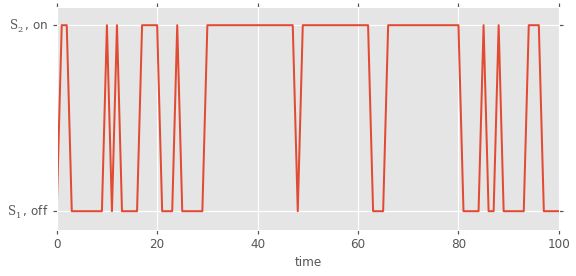

In [ ]:
from python.f04 import *
%matplotlib inline

interact(plot_mc)

## State vectors

Often, we are less interested in individual sample paths, and more interested in the probability distribution over the states.
This could be either due to a desire to know the average behaviour, or due to approximating the behaviour of multiple systems all subject to the same Markov chain.

For example, in our ion channel example, imagine we are only ever capable of recording the average (open/closed) state across $n$ channels.

A _state vector_ (or _state distribution_ or _state_!) for the Markov chain is a (row) vector $\mathbf{x} = (x_i,\ldots,x_n)$ where:

$$0 \leq x_i \leq 1 \;\text{ and }\; \sum_{i=1}^n x_i = 1$$

This defines a _probability distribution_ over the states — $x_i$ is the probability that the system is in state $S_i$ at time $t$.

Let $\mathbf{x}^{(t)} = (x_i^{(t)},\ldots,x_n^{(t)})$ be the state vector at time $t$, then we have

$$ x_j^{(t+1)} = \sum_{i=1}^n x_i^{(t)} p_{ij} \;\text{ or } \;\mathbf{x}^{(t+1)} = \mathbf{x}^{(t)} P $$

More generally, if the initial state at time $t=0$ is $\mathbf{x_0}$ then the state at time $t$ is:

$$ \mathbf{x}^{(t)} = \mathbf{x}^{(t-1)} P = \mathbf{x}^{(t-2)} P^2 = \ldots = \mathbf{x_0} P^t $$ 

## Deterministic simulation

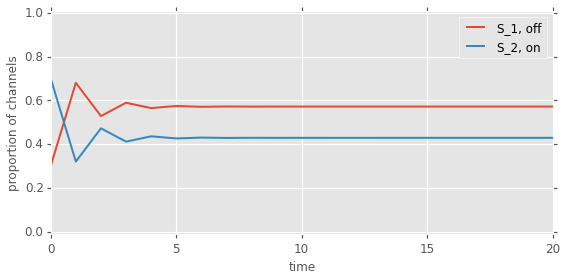

In [ ]:
interact(plot_mc_sol)

## Stochastic simulation

We can also simulate many copies ($n$) of our original system stochastically, this is only a good approximation when $n$ is large (recall _Monte Carlo_ modelling).

n = 54


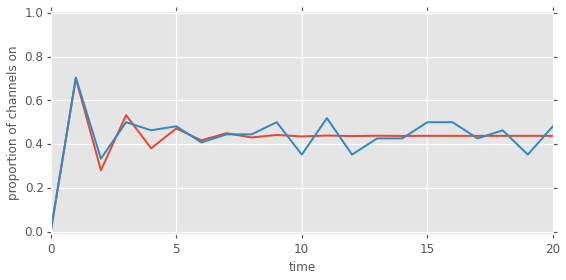

In [ ]:
interact(plot_mc_sol2)

## Stationary distributions

Again, we see the concept of _steady-states_ in the context of Markov chains.
However, we now talk of _steady-state distributions_ (or _stationary, invariant, or equilibrium distributions_).
A stationary distribution is a state distribution $\mathbf{x^\ast}$ such that:

$$ \mathbf{x^\ast} = \mathbf{x^\ast} P $$

Do you notice anything about this equation?

$$ \lambda \mathbf{x^\ast} = \mathbf{x^\ast} P \text{ with $\lambda = 1$} $$

The steady-state $\mathbf{x^\ast}$ is an eigenvector of the transition matrix $P$ with associated eigenvalue 1.
So we know that the steady-states of the Markov chain will always have one eigenvalue equal to 1.
What about the other?

### Stationary distributions of the switch model

We want to find:

$$ \det(P-\lambda I) = 0 $$ 

Where we had:

$$P = \begin{bmatrix}
    p & 1-p \\
    1-q & q
    \end{bmatrix} \implies
    P-\lambda I = \begin{bmatrix}
    p - \lambda & 1-p \\
    1-q & q - \lambda
    \end{bmatrix}
    $$
    
So:

$$\begin{aligned}
    \det(P) &= 0 \\
    (p-\lambda)(q-\lambda) - (1-p)(1-q) &= 0 \\
    \lambda^2 - \lambda (p + q) + pq - (1 - p + q + pq) &= 0 \\
    \lambda^2 - \lambda (p + q) + p + q - 1 &= 0 \\
    (\lambda - 1)(\lambda - p - q + 1) &= 0
    \end{aligned}$$
    
So we have:

$$ \lambda_1 = 1 \;\text{ and }\; \lambda_2 = p + q - 1 $$

Because we have assumed that $P$ is regular $|\lambda_2| = |p + q - 1|<1$.
Let $\mathbf{v_1}$ and $\mathbf{v_2}$ be the eigenvectors that correspond to these eigenvalues.
Then any state of the system can be written uniquely in the form:

$$ \mathbf{x} = \alpha \mathbf{v_1} + \beta \mathbf{v_2} $$

So we can certainly write $\mathbf{x_0}$ in this form:

$$\begin{aligned}
    \mathbf{x}^{(t)} &= \mathbf{x_0} P^t \\
    \mathbf{x}^{(t)} &= \alpha \mathbf{v_1} P^t + \beta \mathbf{v_2} P^t \\
    \mathbf{x}^{(t)} &= \alpha \mathbf{v_1} + \beta \lambda_2^t \mathbf{v_2} \\
    \end{aligned}$$
    
Where the last step is from the definition of eigenvalues/eigenvectors, $\mathbf{v_2} P = \lambda \mathbf{v_2}$.

Since $|\lambda_2| < 1$, the coefficient of the $\mathbf{v_2}$ term tends to zero as $t\rightarrow \infty$.
So:

$$ \lim_{t\rightarrow \infty} \mathbf{x}^{(t)} \rightarrow \alpha \mathbf{v_1} = \mathbf{x^\ast}$$ 

We know that the sum across any state vector must be equal to 1, and so this is also true for $\alpha \mathbf{v_1}$. This means that $\alpha$ is uniquely determined (independent of the choice of $\mathbf{x_0}$) and non-zero.
So we have a unique steady-state $\mathbf{x^\ast}$.

The stationary distribution is equivalent to a stable steady-state.

### Finding the unique stationary distribution

So we need to find the value for $\mathbf{x^\ast}$ for the switch system.
We know:

$$\begin{aligned}
    \mathbf{x^\ast} &= \mathbf{x^\ast} P \\
    \begin{bmatrix}
    x_1^\ast & x_2^\ast
    \end{bmatrix} &= \begin{bmatrix}
    x_1^\ast & x_2^\ast
    \end{bmatrix} \begin{bmatrix}
    p & 1-p \\ 1-q & q
    \end{bmatrix}  \\
    \begin{bmatrix}
    x_1^\ast & x_2^\ast
    \end{bmatrix} &= \begin{bmatrix}
    p x_1^\ast + (1-q) x_2^\ast &
    (1-p)x_2^\ast + q x_2^\ast
    \end{bmatrix} \\
    \end{aligned}$$
    
But we know that $x_1^\ast + x_2^\ast = 1$, so the first column gives:

$$ x_1^\ast = p x_1^\ast + (1-q) (1 - x_1^\ast) $$

Which can be rearranged to give:

$$ x_1^\ast = \frac{1-q}{2 - q - p} \implies x_2^\ast = 1 - x_1^\ast = \frac{1-p}{2 - q - p} $$

So the unique steady-state is:

$$\mathbf{x^\ast} = \begin{bmatrix}
    \frac{1-q}{2 - q - p} & \frac{1-p}{2 - q - p}
    \end{bmatrix}$$

### Steady-states under specific conditions

What happens when $0<p<1$ and $0<q<1$?

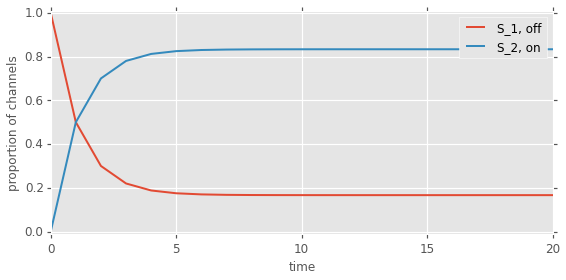

In [ ]:
interact(plot_mc_sol)

What happens when $p=1$ and $q=1$?

$$P = \begin{bmatrix}
    1 & 0 \\
    0 & 1
    \end{bmatrix}$$

So we have the identity matrix, and all initial conditions are stationary states. (The unique steady-state is ill defined!)

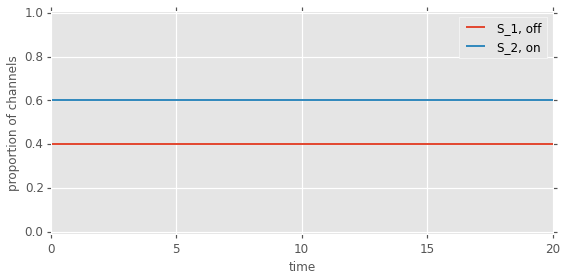

In [ ]:
interact(plot_mc_sol,p=fixed(1),q=fixed(1))

What happens when $p=1$ and $0\leq q<1$?

$$P = \begin{bmatrix}
    1 & 0 \\
    q-1 & q
    \end{bmatrix},\;
    \mathbf{x^\ast} = \begin{bmatrix}
    1 & 0
    \end{bmatrix}$$

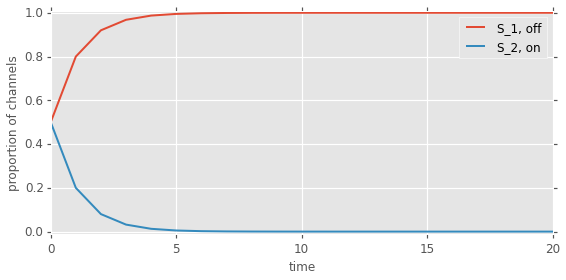

In [ ]:
interact(plot_mc_sol,p=fixed(1))

What happens when $p=0$ and $0<q<1$?

$$P = \begin{bmatrix}
    0 & 1 \\
    q-1 & q
    \end{bmatrix},\;
    \mathbf{x^\ast} = \begin{bmatrix}
    \frac{1-q}{2 - q} & \frac{1}{2 - q}
    \end{bmatrix}$$

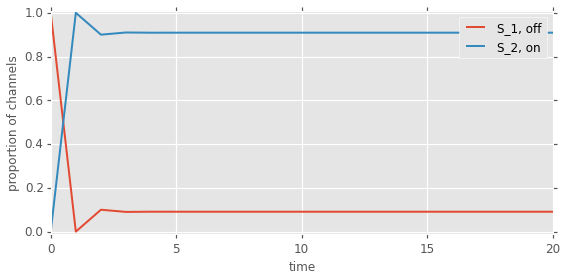

<function python.f04.plot_mc_sol>

In [ ]:
interact(plot_mc_sol,p=fixed(0))

What happens when $p=0$ and $q=0$?

$$P = \begin{bmatrix}
    0 & 1 \\
    1 & 0
    \end{bmatrix},\;
    \mathbf{x^\ast} = \begin{bmatrix}
    \frac{1}{2} & \frac{1}{2}
    \end{bmatrix}$$

So there is a steady-state. But also note that:

$$P^2 = \begin{bmatrix}
    0 & 1 \\
    1 & 0
    \end{bmatrix}^2 = \begin{bmatrix}
    1 & 0 \\
    0 & 1
    \end{bmatrix}$$
    
And so applying the transition probability matrix twice results in the identity matrix.
So we have cycles with period 2.

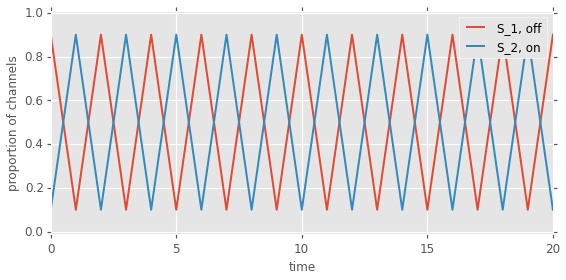

In [ ]:
interact(plot_mc_sol,p=fixed(0), q=fixed(0))

## Backtracking, biological implication of the switch model

Recall that our simple Markov process was introduced as the proportion of ion channels that are open at any one time on the extracellular membrane.

What has the investigation of told us about how we expect similar systems to behave?

Is the model realistic? Is the model useful?

Would there be advantages to studying average behaviour? To simulating stochastic simulations?

n = 148


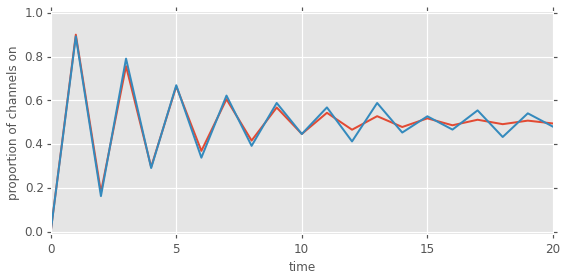

<function python.f04.plot_mc_sol2>

In [ ]:
interact(plot_mc_sol2, p=fixed(0.1), q=fixed(0.1), log_n=fixed(5))

## Some further definitions



The $m$-step transition probability $p^{(m)}_{ij}$ is the probability of transitioning from state $i$ to state $j$ in $m$ steps:

$$ P^{(m)} = P^{m} $$

A state $i$ is:
- _Accessible_ from state $j$ if a system started in state i has a non-zero probability of transitioning into state $j$ at some point. A Markov chain is _irreducible_ if every state is accessible from every other.
- _Recurrent_ (or _persistent_) if the probability of returning to state $i$ is 1.
- _Transient_ if the probability of returning to state $i$ is less than 1.
- _Periodic_ with period $k$ if any return to state $i$ must occur in multiples of $k$ time steps.
- _Aperiodic_ otherwise.
- _Ergodic_ if aperiodic and persistent.
- _Absorbing_ if it is impossible to leave this state. If every state can reach an absorbing state, then the Markov chain is an _absorbing_ Markov chain.

## Example, population genetics and the Fisher-Wright model

Consider the gene for red hair:

> Red hair appears most commonly in people with two copies of a recessive allele on chromosome 16 which produces an altered version of the MC1R protein. [Wikipedia](https://en.wikipedia.org/wiki/Red_hair#Biochemistry_and_genetics)

It has been reported in the news that this gene is likely to die out in the future. We want to know if this is possible.

> A 2007 report in The Courier-Mail, which cited the National Geographic magazine and unnamed "geneticists", said that red hair is likely to die out in the near future. ... However, a HowStuffWorks article says that the foundation was funded by hair-dye maker Procter & Gamble, and that other experts had dismissed the research as either lacking in evidence or simply bogus. [Wikipedia](https://en.wikipedia.org/wiki/Red_hair#Extinction_hoax)

### Model outline

**Aim:** To predict the frequency of red hair within the population of the UK.

**Scale:** Genetic, population

**Approach/method:** Markov process

**Simplifications:**

- No genetic mutation.
- All generations are sequential and non-overlapping.
- All other versions of the gene MC1R can be lumped together.
- The population remains a stable size from generation to generation.

**Assumptions:**

- All red hair is due to two copies of the recessive gene MC1R.
- Sexual reproduction is effectively random (no selection for or against red hair).

### Model mathematics

Let there be $N$ individuals in the population, so the _genepool_ is size $2N$.

Let $x$ be the frequency of allele $a$ (red) in the genepool, and so $1-x$ is the frequency of allele $A$ (not red).
Suppose there are $i$ copies of 'a' in the genepool, then:

$$ x = \frac{i}{2N} $$

Recall the binomial probability formula ($p$ is the probability of success):

$$ Prob(\text{$j$ successes in $n$ trials}) = \begin{pmatrix}n\\j\end{pmatrix} p^j (1-p)^{n-j} $$

Each (new) individual in generation $k+1$ samples twice from the distribution of genes in generation $k$.
There are $N$ individuals in generation $k+1$, and so there will be $2N$ samples (or 'trials').
If we say that allele 'a' constitutes a 'success', then the probability of $j$ copies of allele 'a' in the next generation is given by:

$$ p_{ij} = \begin{pmatrix}2N\\j\end{pmatrix} x^j (1-x)^{2N-j} $$

This is probability of $j$ copies in generation $k+1$, given there were $i$ copies in generation $k$.

n = 2980, i0 = 2384


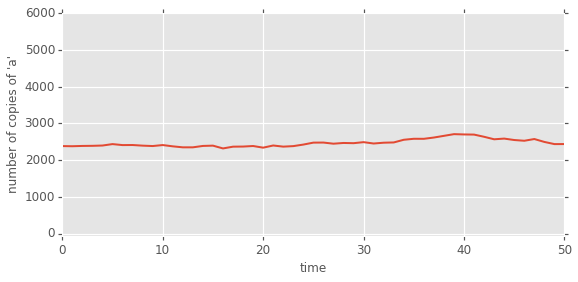

In [ ]:
interact(plot_red_sim, n_sim=fixed(1))

### The martingale property

The expectated copies of allele 'a' in generation $k+1$, given there were $i$ copies in generation $k$ is given by:

$$ Exp(X) = \sum_{j=0}^{2N} p_{ij} \, j = \sum_{j=0}^{2N} \begin{pmatrix}2N\\j\end{pmatrix} x^j (1-x)^{2n-j}\, j$$

Luckily, [we know the expectation for the binomial distribution](https://proofwiki.org/wiki/Expectation_of_Binomial_Distribution):

$$ \sum_{j=0}^{n} \begin{pmatrix}n\\j\end{pmatrix} p^j (1-p)^{n-j}\; j = np$$

And so:

$$\begin{aligned}
    \sum_{j=0}^{2N} p_{ij} \, j &= \sum_{j=0}^{2N} \begin{pmatrix}2N\\j\end{pmatrix} x^j (1-x)^{2-j}\, j \\
    \sum_{j=0}^{2N} p_{ij} \, j &= 2Nx = 2N\times \frac{i}{2N} = i
    \end{aligned}$$

This model satisfies the _martingale property_:

$$ \sum_{j=0}^{n} p_{ij} \, j = i$$

> In probability theory, a martingale is a model of a fair game where knowledge of past events never helps predict the mean of the future winnings. In particular, a martingale is a sequence of random variables (i.e., a stochastic process) for which, at a particular time in the realized sequence, the expectation of the next value in the sequence is equal to the present observed value even given knowledge of all prior observed values. [Wikipedia](https://en.wikipedia.org/wiki/Martingale)

This means that (given we started in state $i$) that the expectated state to which the system will move in one time step is state $i$.
Our best guess as to the frequency of the allele in generation $k+1$ is the frequency in generation $k$.

### Absorbing states

What happens when $i=0$? 

$$ \sum_{j=0}^{n} p_{0j} \, j  = 0$$

So the $p_{0j} = 0$ for all $0<j<n$, and so $p_{00} = 1$.
Therefore $0$ is an _absorbing state_ (it is impossible to leave).

What happens when $i=n$?

$$ \sum_{j=0}^{n} p_{nj} \, j  = n$$

As $j\leq n$ we also have:

$$ \sum_{j=0}^{n} p_{j} \, n =  n\times \sum_{j=0}^{n} p_{nj} = n$$

Setting these equal gives:

$$ \sum_{j=0}^{n} p_{nj} \, j = \sum_{j=0}^{n} p_{j}\, n $$

Because the $0 \leq p_{nj} \leq 1$, this means that we must have $p_{nj} = 0$ for all $0<j<n$ and $p_{nn} = 1$.
Therefore $n$ is also an _absorbing state_.

We have two absorbing states for this system at $i=1$ and $i=n$.
Suppose that the remaining states $1, \ldots, n-1$ are all transient.
Then every state must eventually end up at one of the absorbing states.
But which one?

**Theorem (not proven here)** The martingale property also implies that (given we started in state $i$) that the expectated state to which the system will move in $m$ time steps is also state $i$:

$$ \sum_{j=0}^{n} p^{(m)}_{ij} \, j = i$$

**Theorem (not proven here)** If a state $j$ is transient then for each $i$: $\lim_{m\rightarrow\infty} p_{ij}^{(m)} \rightarrow 0$.

Consider:

$$\lim_{m\rightarrow\infty} \sum_{j=0}^{n} p^{(m)}_{ij} \, j$$

Either $j=0$ or in the limit $p_{ij}^{(m)} \rightarrow 0$ for $0 < j < 0$.
So there is only one non-zero value in the sum:

$$\lim_{m\rightarrow\infty} \sum_{j=0}^{n} p^{(m)}_{ij} \, j  \rightarrow p_{in}^{(m)}n$$

So for the $i=n$ absorbing state:

$$ p_{in}^{(\infty)}n = i \implies p_{in}^{(\infty)} = \frac{i}{n}$$

Hence, for the $i=0$ absorbing state:

$$ p_{i0}^{(\infty)} = 1 - \frac{i}{n}$$

### Probability of gene loss

So we have, as an approximation for large $t$:

$$\begin{aligned}
    \text{proability that allele 'a' is lost} &= 1 - \frac{i}{2N} \\
    \text{proability that allele 'A' is lost} &= \frac{i}{2N}
    \end{aligned}$$
    
So we see that (given enough time) one or another of the alleles will be lost due to _genetic drift_.

### Biological implication of the gene model

What are the effect of $i$ and $N$ on the probability of losing allele 'a' (red hair)?

Is this model realistic? Is it useful?

n = 148, i0 = 177


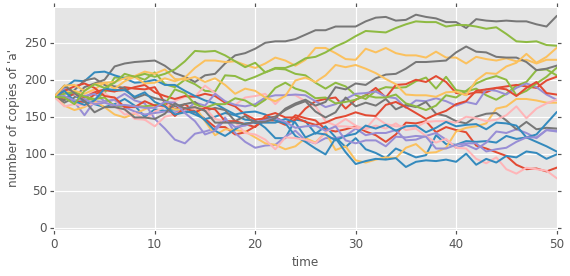

In [ ]:
interact(plot_red_sim, n_sim=fixed(20))

### Scotland

The population of Scotland is approximately 5 million.
In Scotland approximately 10% of the population have red hair and an extra 35% carry the gene.
So we have:

$$ \frac{i}{2N} = \frac{(0.1\times 2+0.35)N}{2N} = \frac{0.55}{2} = 0.275 $$

n = 5000000, i0 = 2750000


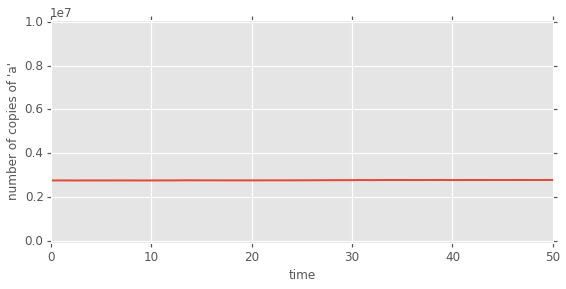

In [ ]:
plot_red_sim(log_n=np.log(5e6), prop_i=0.275)

## Example, allosteric substrate mechanism

An enzyme $A$ must bind to two substrates $i$ and $j$, in two distinct (_allosteric_) binding pockets $A_{ij}$, before catalysing a reaction that produces a single product.

![Markov chain example](images/04_mcexample.png)

### Model outline

**Aim:** To investigate the system.

**Scale:** Molecular, interacting molecules

**Approach/method:** Markov process

**Simplifications:**

- An 'event' occurs at every time step (binding/unbinding).
- ...

**Assumptions:**

- The substrates can bind in either order.
- Substrate unbinding cannot occur.
- Product cannot bind to the enzyme (no product inhibition).
- ...

### Model mathematics

$$ P = \begin{bmatrix}
   0 & 0.5 & 0.5 & 0 \\
   0 & 0 & 0 & 1 \\
   0 & 0 & 0 & 1 \\
   1 & 0 & 0 & 0 
   \end{bmatrix}$$
   
$$ P^2 = \begin{bmatrix}
   0 & 0 & 0 & 0 \\
   1 & 0 & 0 & 0 \\
   1 & 0 & 0 & 0 \\
   0 & 0.5 & 0.5 & 0 
\end{bmatrix}$$

$$ P^3 = \begin{bmatrix}
   1 & 0 & 0 & 0 \\
   0 & 0.5 & 0.5 & 0 \\
   0 & 0.5 & 0.5 & 0 \\
   0 & 0 & 0 & 1 
\end{bmatrix}$$

Recall that a state is _periodic_ with period $k$ if any return to state $i$ must occur in multiples of $k$ time steps.
So every state in this system has period $3$ (zero diagonals for $P$ and $P^2$, non-zero for $P^3$).


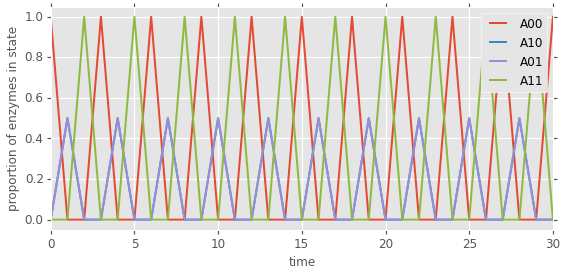

In [ ]:
interact(plot_mc4state, p1=fixed(1),p2=fixed(1))

What about a slightly more general model?

$$ P = \begin{bmatrix}
   1 - \frac{p_1}{2} - \frac{p_2}{2} & \frac{p_1}{2} & \frac{p_2}{2} & 0 \\
   0 & 1 - p_2 & 0 & p_2 \\
   0 & 0 & 1 - p_1 & p_1 \\
   1 & 0 & 0 & 0 
   \end{bmatrix}$$
   
That is we have probability $p_1$ of the enzyme binding to substrate 1, and probability $p_2$ of the enzyme binding to substrate 2.

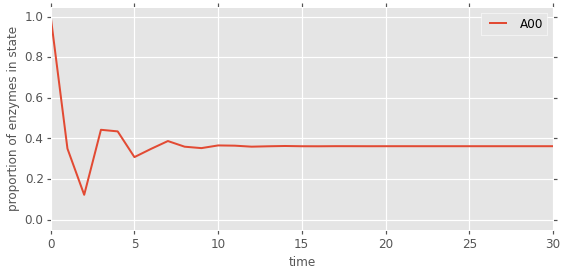

In [ ]:
interact(plot_mc4state)

In [ ]:
# Jupyter notebook setup
from IPython.core.display import HTML
HTML(open("../styles/custom.css", "r").read())